<a href="https://colab.research.google.com/github/aliciayuting/2019-UChicago-Trading-Competition/blob/master/AdHoc_Data_Crawl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

def create_ApI(consumer_key,s_consmer_key,access_key,s_acess_key):
  #given the authroization return a tweepy api object for retrieving data
  auth = tweepy.OAuthHandler(consumer_key, s_consmer_key)
  auth.set_access_token(access_key, s_acess_key)
  api = tweepy.API(auth)
  return api

def tweet_score(status,timeline):
  """
  the current version assign score simply by the time-stamp
  the greater the score assigned is, the more relevant it is
  status: the particular status that we want to assign a score to
  timeline: the entire list of retrieved status
  """
  time = [int(x) for x in list(filter(None,re.split('[\s:-]',str(status.created_at))))]
  score = (time[0]-2000)*120 + time[1]*10 + time[2] + time[3]/12
  return score

def retrieve_tweets(N,celeb_name,inc_retweets,api):
  """
  help to retrieve the needed number of tweets beyond the number 20
  this function does not assigne scores to each tweets
  N: the number of wanted tweets
  celeb_name: the screen name of the celebrity
  inc_retweets: a boolean varibale indicating whether retweets
                are going to be included
  """
  if inc_retweets:
    return list(api.user_timeline(screen_name = celeb_name,count = N))

  pool = list(api.user_timeline(screen_name = celeb_name,count = 2*N))
  print(len(pool),'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',N)
  result = []
  count = 0
  while count<20: 
    for status in pool[:-1]:
      if not hasattr(status,'retweeted_status'):
        result.append(status)
      if len(result) == N:
        return result
    last = pool[-1].id
    pool = list(api.user_timeline(screen_name = celeb_name,count = 2*N,\
                                  since_id = 1,max_id=last))
    print(len(pool))
    count += 1
  return (None,'the user made no recent tweets, try include retweets')


def tweets_crawl(N,pool_size,celeb_name,api,inc_retweets):
  """ 
    retrieve the top N tweets tweeted by the celeb_account
    N: the number of wnated accounts

    celeb_name: a string, the screen_name of the celebrity
    api: the tweepy api object
    pool_size: the size of the pool of potential tweets from which we retrieve
      N most significant
  """
  timeline = retrieve_tweets(pool_size,celeb_name,inc_retweets,api)
  if timeline[0] is None:
    print(timeline[1])
    return
  sorted_timeline = []
  for status in timeline:
    score = tweet_score(status,timeline)
    sorted_timeline.append((status,score))
  sorted_timeline = sorted(sorted_timeline,key=lambda x:x[1],reverse = True)
  return sorted_timeline[:N]

In [0]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import praw
import json


reddit = praw.Reddit(client_id='qw6NUV8dr0rTEA',
                     client_secret="TZYwwhS_VigN7QVWsYIspmIGj3g", password='love_python',
                     user_agent='TweetedFacts', username='Zeno_Won')
new_sub = reddit.subreddit('News')
recent = new_sub.new(limit = None)#list of submission ids



print(reddit.user.me())




Zeno_Won


Codes for Reddit API, now abandoned 

In [0]:


def reddit_sub_retrieve(N,query,date1,date2):
  """
  https://pushshift.io/api-parameters/
  thanks pushshift
  """
  url = "https://api.pushshift.io/reddit/submission/search/?"
  query_t = ''
  if query != None:
    query_t = 'q=' + query + '&'
  date1_e = 'after'+ str(datetime.strptime(date1,'%Y-%m-%d-%H-%S').timestamp())
  date2_e = '&before'+ str(datetime.strptime(date2,'%Y-%m-%d-%H-%S').timestamp())
  url = url + query_t + date1_e + date2_e + '&subreddit=news'
  agg_file = json.load(urllib.request.urlopen(url))
  return agg_file

instance = reddit_sub_retrieve(0,None,'2020-04-09-11-05','2020-04-10-12-05')


TypeError: ignored

In [0]:
def bing_retrieve_raw(N,query,key):
  #Bing API
  search_url = "https://api.cognitive.microsoft.com/bing/v7.0/news/search"
  headers = {"Ocp-Apim-Subscription-Key" : key}
  q = ''
  if not query is None:
    q = query
  params  = {"q": q, 'count':100,'offset':1,'mkt':'en-US'}
  response = requests.get(search_url, headers=headers, params=params)
  response.raise_for_status()
  search_results = response.json()

  while collected != N:
  return search_results


In [0]:
import requests
wanted = ['id','is_video','num_comments','permalink','score','title','selftext','preview','url','domain']
bing_key = '3903dc2afaba49208df3bcb91206fe22'
exp = bing_retrieve_raw(1000,None,bing_key)


In [0]:
print(exp['value'][2]['description'])

In his daily briefings on the coronavirus, President Donald Trump has brandished all the familiar tools in his rhetorical arsenal: belittling Democratic governors, demonizing the media, trading in innuendo and bulldozing over the guidance of experts. It’s the kind of performance the president relishes but one that has his advisers and ...
AirPods are easy to misplace, we know. If you recently had to acquire a single replacement AirPod earbud, you might assume that all is now wellyour lonely AirPod now has a friend again. However, a number of Apple fans are reporting that their replacement AirP… [+1153 chars]


In [0]:


def raw_news_retrieval(query,api_key,date1,date2,N,page,sort):
  """
  return a json file specified in https://open-platform.theguardian.com/documentation/search
  query: a tuple or a keyword, the tuple should represent
        
  api_key: the auth key to retrieve the news
  time_span: a string in the format of 'yyyy-mm-dd:yyyy-mm-dd' indicating the
            timespan from the first date to the second one
  """
  #build the url
  keys_a = "&apiKey=" + api_key
  date_a = '&to='+date2+'&from='+date1
  if not query is None:
    query = 'everything?q='+query + '&'
  else:
    query = 'everything?q='
  url = "https://newsapi.org/v2/"+query\
        +'page='+str(page)+'&pageSize=' +str(N)+'&sortBy='+ sort +date_a+keys_a

  print(url)
  agg_file = json.load(urllib.request.urlopen(url))
 
  return agg_file


def retrieve_news_article(N,key,query,date1,date2):
  results = []
  date = date1+':'+date2
  results_left = 1
  page = 1
  while results_left != 0:
    instance = raw_news_retrieval(query,key,date1,date2,100,page,'popularity')
    totalSize = instance['totalResults']
    results.extend(instance['articles'])
    results_left = totalSize-len(results)
    if len(results) >= N:
      return results[:N]
    page = page + 1  

In [0]:
import tweepy
import math
import re
import urllib
import json
from datetime import datetime
from dateutil.parser import parse
from datetime import timedelta
import sys

start = datetime.now()
instance = retrieve_news_article(2000,'8ba8b6889b1343508e1ba0b55849ec31',None,'2020-03-10','2020-04-10')
print(instance[0])
wanted = ['source','author','description','publi_time','url','content']
full1 = []
count = 0
for idx in instance:
  data1 = {x:None for x in wanted}
  data1['source'] = idx['source']['name']
  data1['author'] = idx['author']
  data1['description'] = idx['description']
  data1['publi_time'] = idx['publishedAt']
  data1['url'] = idx['url']
  data1['content'] = idx['content']
  full1.append(data1)
  count += 1

print(datetime.now()-start)
with open('/content/drive/My Drive/News_News.txt',"w") as outfile:
  json.dump(full1,outfile)


https://newsapi.org/v2/everything?q=page=1&pageSize=100&sortBy=popularity&to=2020-04-10&from=2020-03-10&apiKey=8ba8b6889b1343508e1ba0b55849ec31
https://newsapi.org/v2/everything?q=page=2&pageSize=100&sortBy=popularity&to=2020-04-10&from=2020-03-10&apiKey=8ba8b6889b1343508e1ba0b55849ec31
https://newsapi.org/v2/everything?q=page=3&pageSize=100&sortBy=popularity&to=2020-04-10&from=2020-03-10&apiKey=8ba8b6889b1343508e1ba0b55849ec31
https://newsapi.org/v2/everything?q=page=4&pageSize=100&sortBy=popularity&to=2020-04-10&from=2020-03-10&apiKey=8ba8b6889b1343508e1ba0b55849ec31
https://newsapi.org/v2/everything?q=page=5&pageSize=100&sortBy=popularity&to=2020-04-10&from=2020-03-10&apiKey=8ba8b6889b1343508e1ba0b55849ec31
https://newsapi.org/v2/everything?q=page=6&pageSize=100&sortBy=popularity&to=2020-04-10&from=2020-03-10&apiKey=8ba8b6889b1343508e1ba0b55849ec31
https://newsapi.org/v2/everything?q=page=7&pageSize=100&sortBy=popularity&to=2020-04-10&from=2020-03-10&apiKey=8ba8b6889b1343508e1ba0b55

In [0]:
print(full1[-1])

{'source': 'Boingboing.net', 'author': "Boing Boing's Shop", 'description': "If you've recently faced a major shift in where you work — as in, from an actual office to your home — you're probably in need of a little assistance to help you navigate that transition more smoothly. Or, maybe you’ve always worked from home, and now the res…", 'publi_time': '2020-03-21T01:30:00Z', 'url': 'https://boingboing.net/2020/03/20/while-youre-stuck-at-home.html', 'content': "If you've recently faced a major shift in where you work as in, from an actual office to your home you're probably in need of a little assistance to help you navigate that transition more smoothly. Or, maybe youve always worked from home, and now the rest of … [+6907 chars]"}


Plotting

In [0]:
average_length1 = {}
average_length2 = {}
length1 = 0
length2 = 0
for ins in full1:
  old1 = average_length1.get(ins['source'],(0,0))
  old2 = average_length2.get(ins['source'],(0,0))
  average_length1[ins['source']] = (old1[0]+len(ins['description']),old1[1]+1)
  if ins['content'] is not None:
    average_length2[ins['source']] = (old2[0]+len(ins['content']),old2[1]+1)
    length2 += len(ins['content'])
  else:
    average_length2[ins['source']] = (old2[0]+0,old2[1]+1)
    length2 += 0
  length1 += len(ins['description'])

for keys in average_length1.keys():
  average_length1[keys] = (average_length1[keys][0]/average_length1[keys][1],average_length1[keys][1])
  average_length2[keys] = (average_length2[keys][0]/average_length2[keys][1],average_length1[keys][1])
length1 = length1/len(full1)
length2 = length2/len(full1)

print(length1)
print(length2)
print(average_length1)
print(average_length2)

212.65
264.306
{'Lifehacker.com': (209.8181818181818, 22), 'Engadget': (260.0, 33), 'The Verge': (239.75, 8), 'TechCrunch': (250.0408163265306, 49), 'Theinventory.com': (173.66666666666666, 30), 'Gizmodo.com': (211.84615384615384, 39), 'Mashable': (260.0, 40), 'BBC News': (114.95833333333333, 24), 'CNN': (215.25, 8), 'Ars Technica': (75.5, 16), 'Blog.google': (260.0, 23), 'Reuters': (216.66666666666666, 3), 'Androidcentral.com': (259.9047619047619, 84), 'Cnet.com': (121.11504424778761, 113), 'Business Insider': (260.0, 240), 'Welt.de': (260.0, 9), 'Entrepreneur.com': (82.27272727272727, 55), 'Macrumors.com': (260.0, 13), 'Npr.org': (179.86666666666667, 15), 'Slashdot.org': (260.0, 9), 'Wired': (149.25, 8), 'Theconversation.com': (260.0, 3), 'Makezine.com': (238.0, 6), 'Worldpoliticsreview.com': (260.0, 1), 'Smashingmagazine.com': (260.0, 4), 'Canoe.com': (192.0, 2), 'Globalnews.ca': (260.0, 1), 'Mlive.com': (260.0, 1), 'Www.tsn.ca': (260.0, 1), 'Chessbase.com': (260.0, 2), 'Sudbury.com

[22, 33, 8, 49, 30, 39, 40, 24, 8, 16, 23, 3, 84, 113, 240, 9, 55, 13, 15, 9, 8, 3, 6, 1, 4, 2, 1, 1, 1, 2, 1, 13, 6, 1, 10, 16, 9, 14, 2, 8, 2, 1, 2, 1, 5, 3, 7, 1, 1, 1, 2, 4, 5, 8, 5, 1, 7, 1, 1]
[274.0, 274.09090909090907, 274.125, 274.16326530612247, 275.0, 274.1794871794872, 274.025, 274.2083333333333, 274.375, 274.1875, 273.9130434782609, 273.6666666666667, 274.14285714285717, 274.46902654867256, 245.45416666666668, 275.0, 274.0, 273.84615384615387, 274.0, 273.77777777777777, 274.0, 0.0, 274.6666666666667, 0.0, 275.0, 274.0, 274.0, 274.0, 274.0, 274.0, 274.0, 253.15384615384616, 274.0, 274.0, 274.3, 274.5, 274.1111111111111, 274.0, 275.0, 273.875, 273.5, 274.0, 274.0, 274.0, 274.2, 275.0, 274.0, 274.0, 274.0, 274.0, 274.5, 275.0, 275.0, 68.375, 274.2, 274.0, 274.85714285714283, 274.0, 274.0]


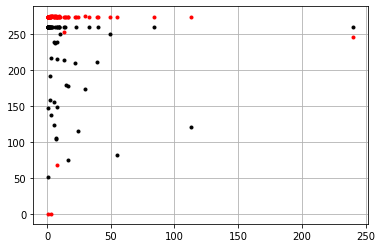

In [0]:
import matplotlib.pyplot as plt

des = []
content = []
x_label = []
for keys in average_length1.keys():
  des.append(average_length1[keys][0])
  content.append(average_length2[keys][0])
  x_label.append(average_length1[keys][1])


print(x_label)
print(content)

plt.plot(x_label,des, '.k')
plt.plot(x_label,content, '.r')
plt.grid()

plt.show()









Guardian

In [0]:


def generate_q(query):
  result = ''
  if type(query) == str:
    #the base case
    return query
  else:
    if query[1] == 0:
      op = '%20NOT%20'
      return '('+op + generate_q(query[0])+')'
    else:
      if query[1] == 1:
        op =  '%20AND%20'
      else:
        op =  '%20OR%20'
      return '('+generate_q(query[0][0]) + op + generate_q(query[0][1])+')'

def raw_g_retrieval(query,api_key,time_span,N,page):
  """
  return a json file specified in https://open-platform.theguardian.com/documentation/search
  query: a tuple or a keyword, the tuple should represent
        a relation
        ((a,b),1) -> a and b
        ((a,b),2) -> a or b
        ((a,(b,0)),1) -> a and NOT b
        (((a,b),1),(((c,d),2),0),1) = (a AND B) AND NOT (c OR d)
        means reddit AND NOT news AND (random or guardian)
  api_key: the auth key to retrieve the news
  time_span: a string in the format of 'yyyy-mm-dd:yyyy-mm-dd' indicating the
            timespan from the first date to the second one
  """
  #build the url
  date = re.split(':',time_span)
  keys_a = "&api-key=" + api_key
  date_a = '&to-date='+date[1]+'&from-date='+date[0]
  if not query is None:
    query = 'search?q='+generate_q(query) + '&'
  else:
    query = 'search?'
  url = "https://content.guardianapis.com/"+query+'show-blocks=all'+'&format=json'\
        +'&page='+str(page)+'&page-size=' +str(N)+date_a+keys_a

  agg_file = json.load(urllib.request.urlopen(url))
  return agg_file


def retrieve_g_article(N,key,query,date1,date2):
  results = []
  date_counter = date2+':'+date2
  start_date = datetime.strptime(date2,'%Y-%m-%d')
  end_date = datetime.strptime(date1,'%Y-%m-%d')
  while len(results)<N and start_date>=end_date:
    instance = raw_g_retrieval(query,key,date_counter,200)
    for idx in instance['response']['results']:
      if idx['type'] == 'article':
        results.append(idx)
        if len(results) == N:
          break
    start_date = start_date - timedelta(days=1)
    new_date = start_date.strftime("%Y-%m-%d")
    date_counter =  new_date+':'+new_date
  return results

def retrieve_g_article1(N,key,query,date1,date2):
  results = []
  date = date1+':'+date2
  page_left = 1
  page = 1
  while page_left != 0:
    instance = raw_g_retrieval(query,key,date,200,page)
    
    pageSize = instance['response']['pageSize']
    currentPage = instance['response']['currentPage']
    for idx in instance['response']['results']:
      if idx['type'] == 'article':
        results.append(idx)
        if len(results) == N:
          return results 
    
    page_left = pageSize-currentPage
    page = page + 1 

In [0]:
import tweepy
import math
import re
import urllib
import json
from datetime import datetime
from dateutil.parser import parse
from datetime import timedelta
import sys

start = datetime.now()
instance = retrieve_g_article1(2000,'7dd62f93-de59-4cb6-a166-e7c44543477d',None,'2020-01-01','2020-04-05')
print(instance[0])
wanted = ['sectionName','webTitle','content','publi_time','url']
full = []
count = 0
for idx in instance:
  data = {x:None for x in wanted}
  data['sectionName'] = idx['sectionName']
  data['webTitle'] = idx['webTitle']
  data['publi_time'] = idx['webPublicationDate']
  data['content'] = idx['blocks']['body'][0]['bodyTextSummary']
  data['url'] = idx['webUrl']
  full.append(data)
  count += 1

print(datetime.now()-start)
with open('/content/drive/My Drive/Guardian_News.txt',"w") as outfile:
  json.dump(full,outfile)

{'id': 'crosswords/2020/apr/06/annotated-solutions-for-genius-201', 'type': 'article', 'sectionId': 'crosswords', 'sectionName': 'Crosswords', 'webPublicationDate': '2020-04-05T23:01:41Z', 'webTitle': 'Annotated solutions for Genius 201', 'webUrl': 'https://www.theguardian.com/crosswords/2020/apr/06/annotated-solutions-for-genius-201', 'apiUrl': 'https://content.guardianapis.com/crosswords/2020/apr/06/annotated-solutions-for-genius-201', 'blocks': {'body': [{'id': '5e887b618f08c35a1d119ee4', 'bodyHtml': '<p>* In Victor Borge’s ‘Inflationary Language’ ‘four’ and ‘for’, for example, became ‘five’. Here, when the solutions defined in the clues that contain numbers (or homophones of numbers), these must be treated in the same way before entry in the grid.</p> <h2>Across</h2> <p><strong>5</strong> phtwo-in/phone-in P(ublic)H(ouse) + TW&lt;O(rdered)&gt;IN </p> <p><strong>7</strong> captwo/Capone COWPAT (anag)</p> <p><strong>9</strong> throatee/boat race THR&lt;OAT&gt;EE [brace/three] </p> <p

In [0]:
list0 = []
for ins in full:
  list0.append(len(ins['content']))

29877


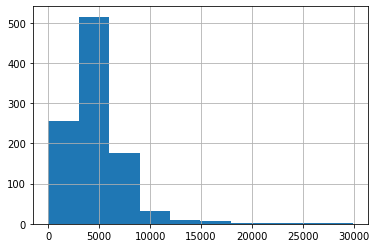

In [0]:
import matplotlib.pyplot as plt


print(max(list0))


plt.hist(list0)
plt.grid()

plt.show()

In [0]:
import tweepy
import math
import datetime
import re
import urllib
import json

# https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
#all these keys should go into a json (or the provided secrect environment file
#later for secrecy
c_key = '4xQ7FcDfGAlAM5JkG505ndS3k'
s_c_key = 'GJkKVtF34AoqaXSdCXq6agxCKrj1T2FL9i2w28Yj9t2wCo6jmM'
a_key =  '1247186585994637312-6ZuAFM9bhsv1Mil7utLrL0stxbT8ft'
s_a_key = 'PkPrIdOOPSoQwCM0TuKF4dqLiKOOdTemEpjh2Ewf44FUd'
guardian_key = '7dd62f93-de59-4cb6-a166-e7c44543477d'


api =  create_ApI(c_key,s_c_key,a_key,s_a_key)
user = api.get_user(screen_name='realDonaldTrump')
data = {}


wanted = ['text','created_at','id','retweet_count','favorite_count']
data = {x:[] for x in wanted}
count = 0
recent = tweets_crawl(400,400,'realDonaldTrump',api,False)
for idx in recent:
  idx = idx[0]._json
  for key in data.keys():
    data[key].append(idx[key])
  count += 1
  print(count)

with open('/content/drive/My Drive/Twitter_Account.txt',"w") as outfile:
  json.dump(data,outfile)

200 !!!!!!!!!!!!!!!!!!!!!!!!!!!!! 400
200
200
200
200
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
26